In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [2]:
# Cargar el dataset
file_path = "diabetes_dataset.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para familiarizarse
print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0           0   58  Female     White  35.8                 83.4   
1           1   48    Male     Asian  24.1                 71.4   
2           2   34  Female     Black  25.0                113.8   
3           3   62    Male     Asian  32.7                100.4   
4           4   27  Female     Asian  33.5                110.8   

   Fasting_Blood_Glucose  HbA1c  Blood_Pressure_Systolic  \
0                  123.9   10.9                      152   
1                  183.7   12.8                      103   
2                  142.0   14.5                      179   
3                  167.4    8.8                      176   
4                  146.4    7.1                      122   

   Blood_Pressure_Diastolic  ...  Cholesterol_HDL  Cholesterol_LDL   GGT  \
0                       114  ...             50.2             99.2  37.5   
1                        91  ...             62.0     

# LIMPIEZA DE DATOS

### 1. Verificar valores nulos en el dataset

In [3]:
print("Valores nulos en cada columna:")
print(df.isnull().sum())

Valores nulos en cada columna:
Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64


In [4]:
print(df.dtypes)

Unnamed: 0                         int64
Age                                int64
Sex                               object
Ethnicity                         object
BMI                              float64
Waist_Circumference              float64
Fasting_Blood_Glucose            float64
HbA1c                            float64
Blood_Pressure_Systolic            int64
Blood_Pressure_Diastolic           int64
Cholesterol_Total                float64
Cholesterol_HDL                  float64
Cholesterol_LDL                  float64
GGT                              float64
Serum_Urate                      float64
Physical_Activity_Level           object
Dietary_Intake_Calories            int64
Alcohol_Consumption               object
Smoking_Status                    object
Family_History_of_Diabetes         int64
Previous_Gestational_Diabetes      int64
dtype: object


### 2. Limpiar los tipos de datos inconsistentes

In [5]:
# Convertir 'sex' a valores numéricos: male = 0, female = 1
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})

# Eliminar columna de índice no necesaria
df = df.drop(columns=['Unnamed: 0'])

# Verificar tipos de datos después de la conversión
print("\nTipos de datos después de la limpieza:")
print(df.dtypes)


Tipos de datos después de la limpieza:
Age                                int64
Sex                                int64
Ethnicity                         object
BMI                              float64
Waist_Circumference              float64
Fasting_Blood_Glucose            float64
HbA1c                            float64
Blood_Pressure_Systolic            int64
Blood_Pressure_Diastolic           int64
Cholesterol_Total                float64
Cholesterol_HDL                  float64
Cholesterol_LDL                  float64
GGT                              float64
Serum_Urate                      float64
Physical_Activity_Level           object
Dietary_Intake_Calories            int64
Alcohol_Consumption               object
Smoking_Status                    object
Family_History_of_Diabetes         int64
Previous_Gestational_Diabetes      int64
dtype: object


### 3. Manejo de valores nulos

In [6]:
# Eliminar las filas donde la columna 'Alcohol_Consumption' tenga valores nulos (NaN)
df = df.dropna(subset=['Alcohol_Consumption'])

# Después de la limpieza, verificar nuevamente si hay valores nulos
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())


Valores nulos después de la limpieza:
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
dtype: int64


### 4. Detección de valores duplicados

In [7]:
print(f"\nCantidad de filas duplicadas: {df.duplicated().sum()}")

# Eliminar duplicados si existen
df_cleaned = df.drop_duplicates()


Cantidad de filas duplicadas: 0


### 5. Verificación de valores atípicos (outliers) en 'Family_History_of_Diabetes'

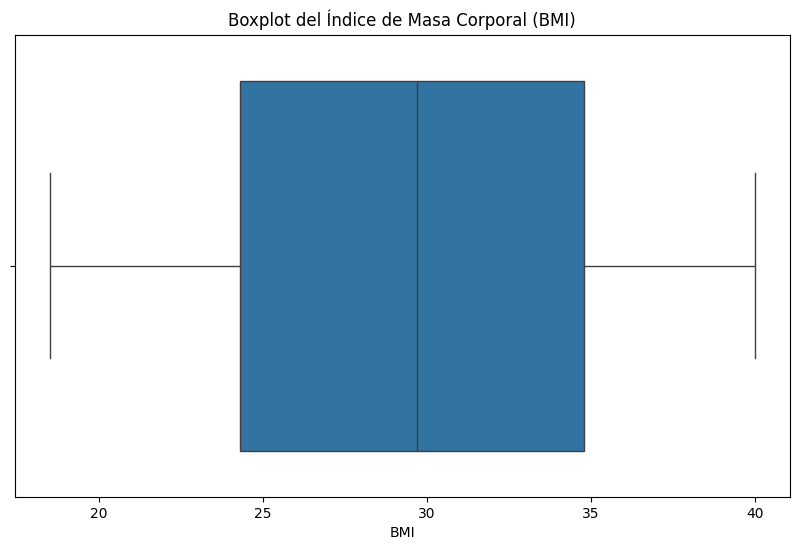

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['BMI'])
plt.title('Boxplot del Índice de Masa Corporal (BMI)')
plt.xlabel('BMI')
plt.show()


# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

### 1. Descripción estadística general de las columnas numéricas

In [9]:
# Mostrar información básica
print("Información del dataset:")
print(df_cleaned.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            6680 non-null   int64  
 1   Sex                            6680 non-null   int64  
 2   Ethnicity                      6680 non-null   object 
 3   BMI                            6680 non-null   float64
 4   Waist_Circumference            6680 non-null   float64
 5   Fasting_Blood_Glucose          6680 non-null   float64
 6   HbA1c                          6680 non-null   float64
 7   Blood_Pressure_Systolic        6680 non-null   int64  
 8   Blood_Pressure_Diastolic       6680 non-null   int64  
 9   Cholesterol_Total              6680 non-null   float64
 10  Cholesterol_HDL                6680 non-null   float64
 11  Cholesterol_LDL                6680 non-null   float64
 12  GGT                         

In [10]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))


Estadísticas descriptivas:
                Age          Sex Ethnicity          BMI  Waist_Circumference  \
count   6680.000000  6680.000000      6680  6680.000000          6680.000000   
unique          NaN          NaN         4          NaN                  NaN   
top             NaN          NaN     Black          NaN                  NaN   
freq            NaN          NaN      1707          NaN                  NaN   
mean      44.625749     0.496707       NaN    29.549311            94.707305   
std       14.325345     0.500027       NaN     6.146514            14.405150   
min       20.000000     0.000000       NaN    18.500000            70.000000   
25%       32.000000     0.000000       NaN    24.300000            81.900000   
50%       45.000000     0.000000       NaN    29.700000            94.800000   
75%       57.000000     1.000000       NaN    34.800000           106.800000   
max       69.000000     1.000000       NaN    40.000000           120.000000   

        Fas

In [11]:
print("\nDescripción estadística de las columnas numéricas:")
print(df_cleaned.describe())


Descripción estadística de las columnas numéricas:
               Age          Sex          BMI  Waist_Circumference  \
count  6680.000000  6680.000000  6680.000000          6680.000000   
mean     44.625749     0.496707    29.549311            94.707305   
std      14.325345     0.500027     6.146514            14.405150   
min      20.000000     0.000000    18.500000            70.000000   
25%      32.000000     0.000000    24.300000            81.900000   
50%      45.000000     0.000000    29.700000            94.800000   
75%      57.000000     1.000000    34.800000           106.800000   
max      69.000000     1.000000    40.000000           120.000000   

       Fasting_Blood_Glucose        HbA1c  Blood_Pressure_Systolic  \
count            6680.000000  6680.000000              6680.000000   
mean              134.673847     9.515015               134.151347   
std                37.862039     3.170255                25.952304   
min                70.000000     4.000000     

In [12]:
# Verificar balance de clases
print("\nDistribución de la variable objetivo (Family_History_of_Diabetes):")
print(df_cleaned['Family_History_of_Diabetes'].value_counts(normalize=True))


Distribución de la variable objetivo (Family_History_of_Diabetes):
Family_History_of_Diabetes
1    0.511228
0    0.488772
Name: proportion, dtype: float64


### 2. Visualización de relaciones

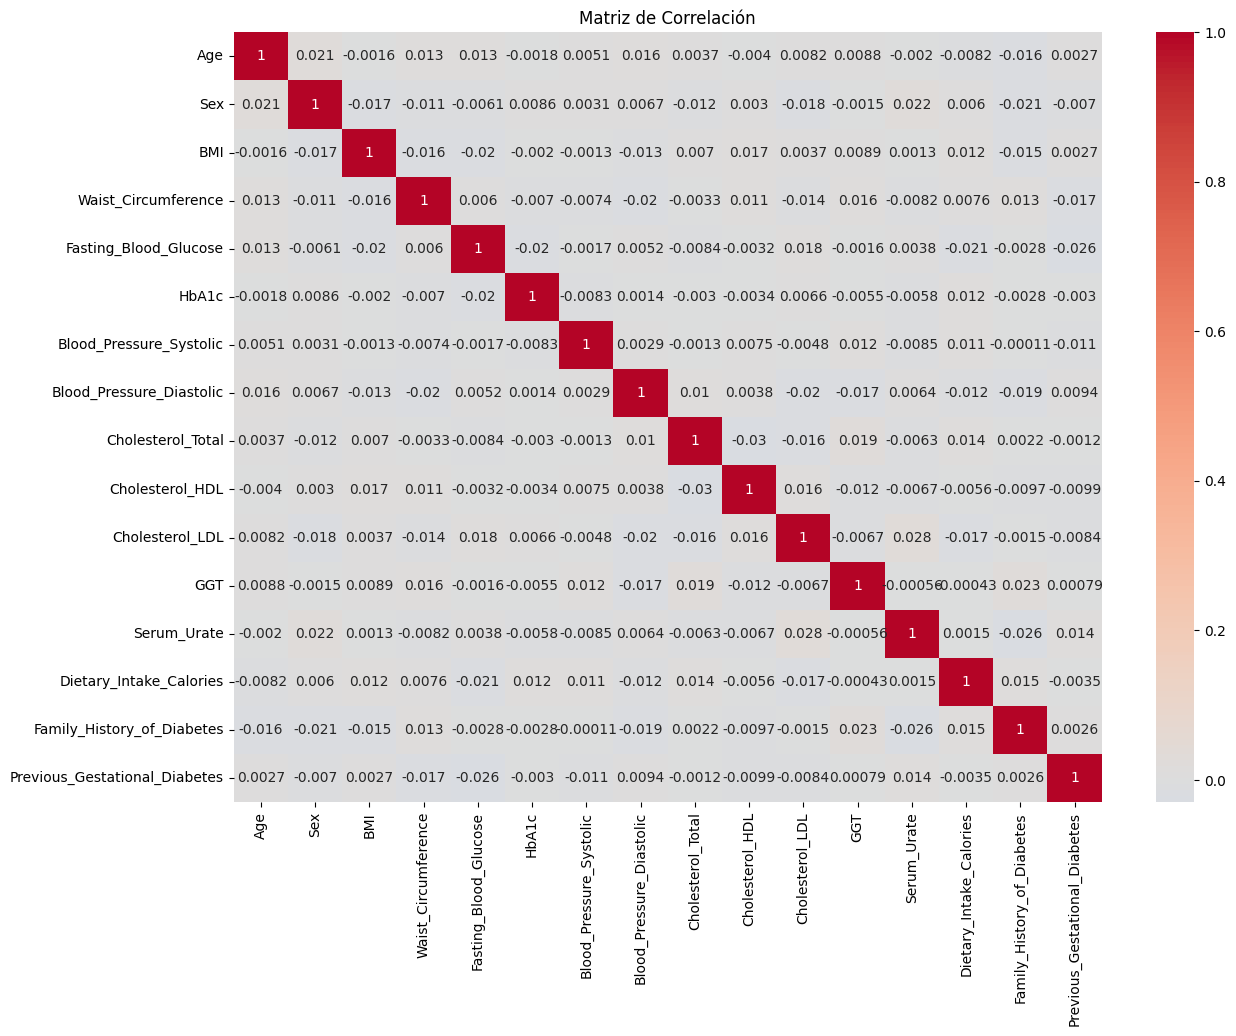

In [13]:
# Matriz de correlación para variables numéricas
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

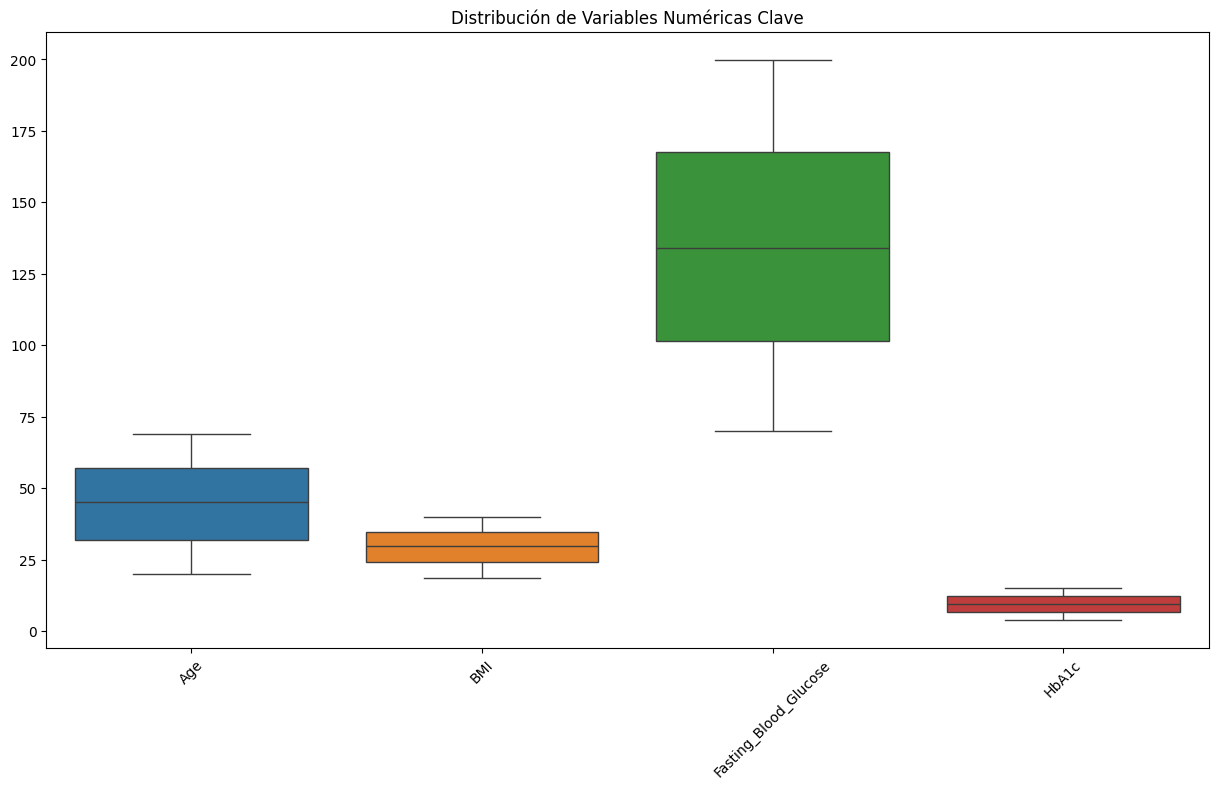

In [14]:
# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned[['Age', 'BMI', 'Fasting_Blood_Glucose', 'HbA1c']])
plt.title('Distribución de Variables Numéricas Clave')
plt.xticks(rotation=45)
plt.show()

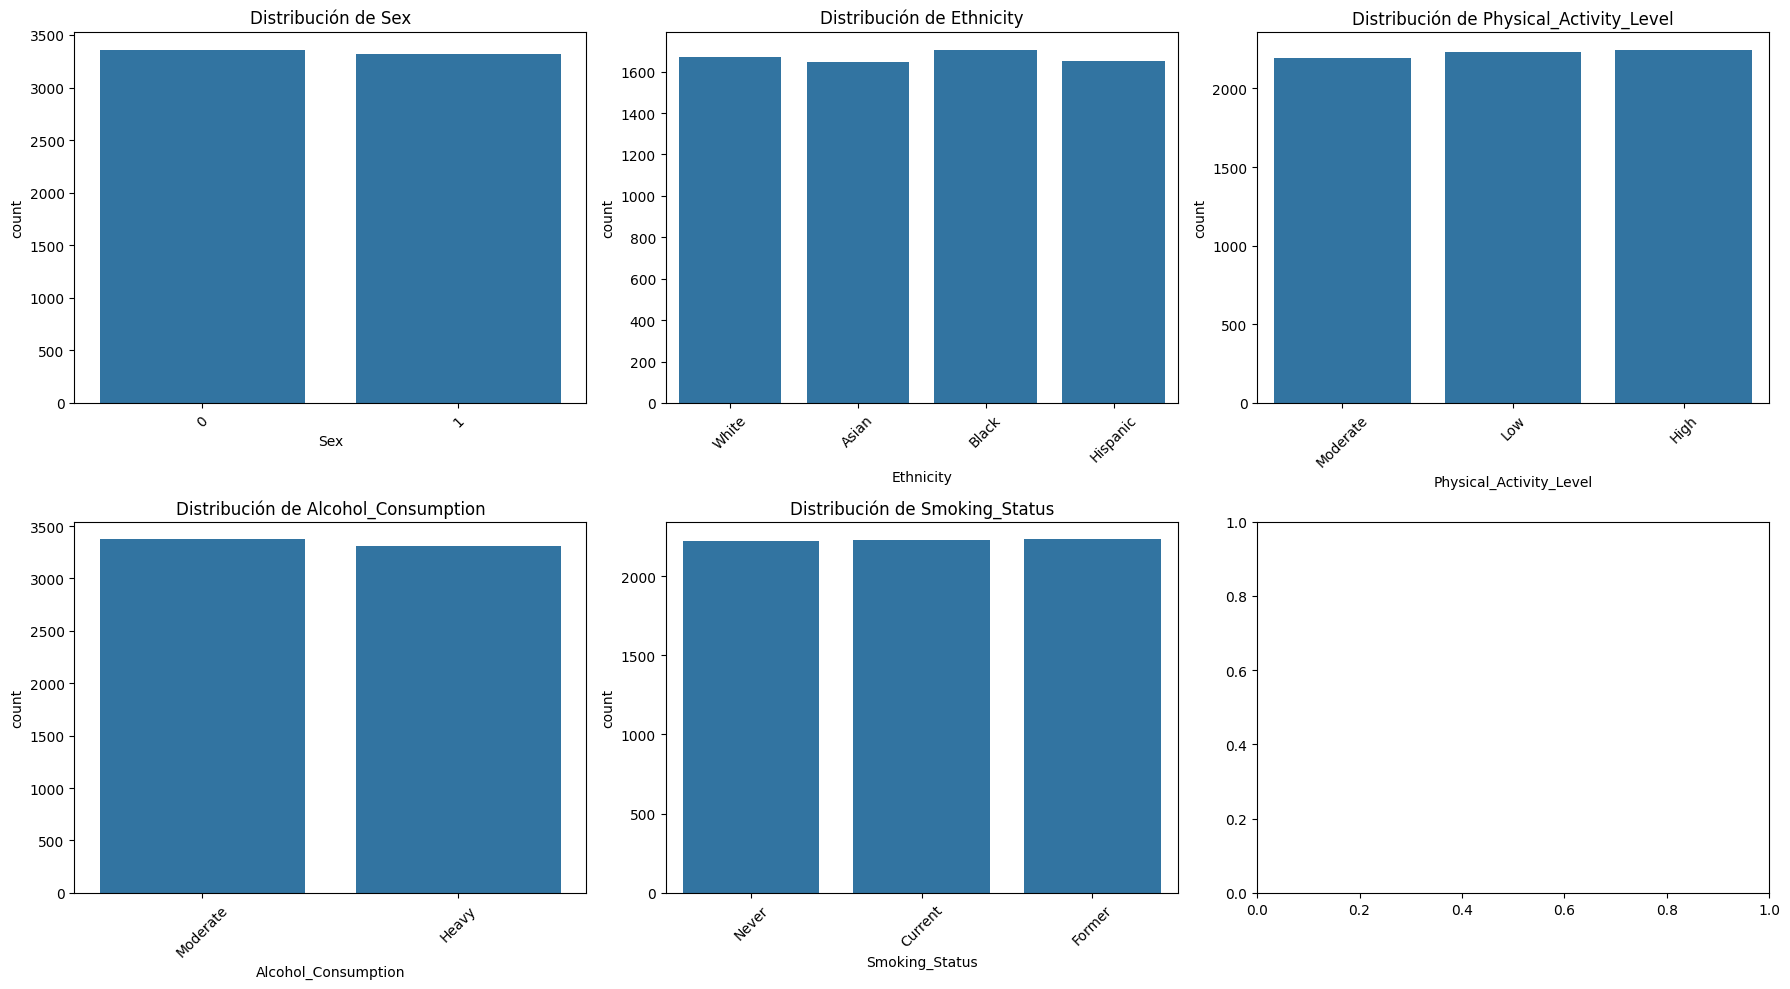

In [15]:
# Distribución de variables categóricas
cat_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_cleaned, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

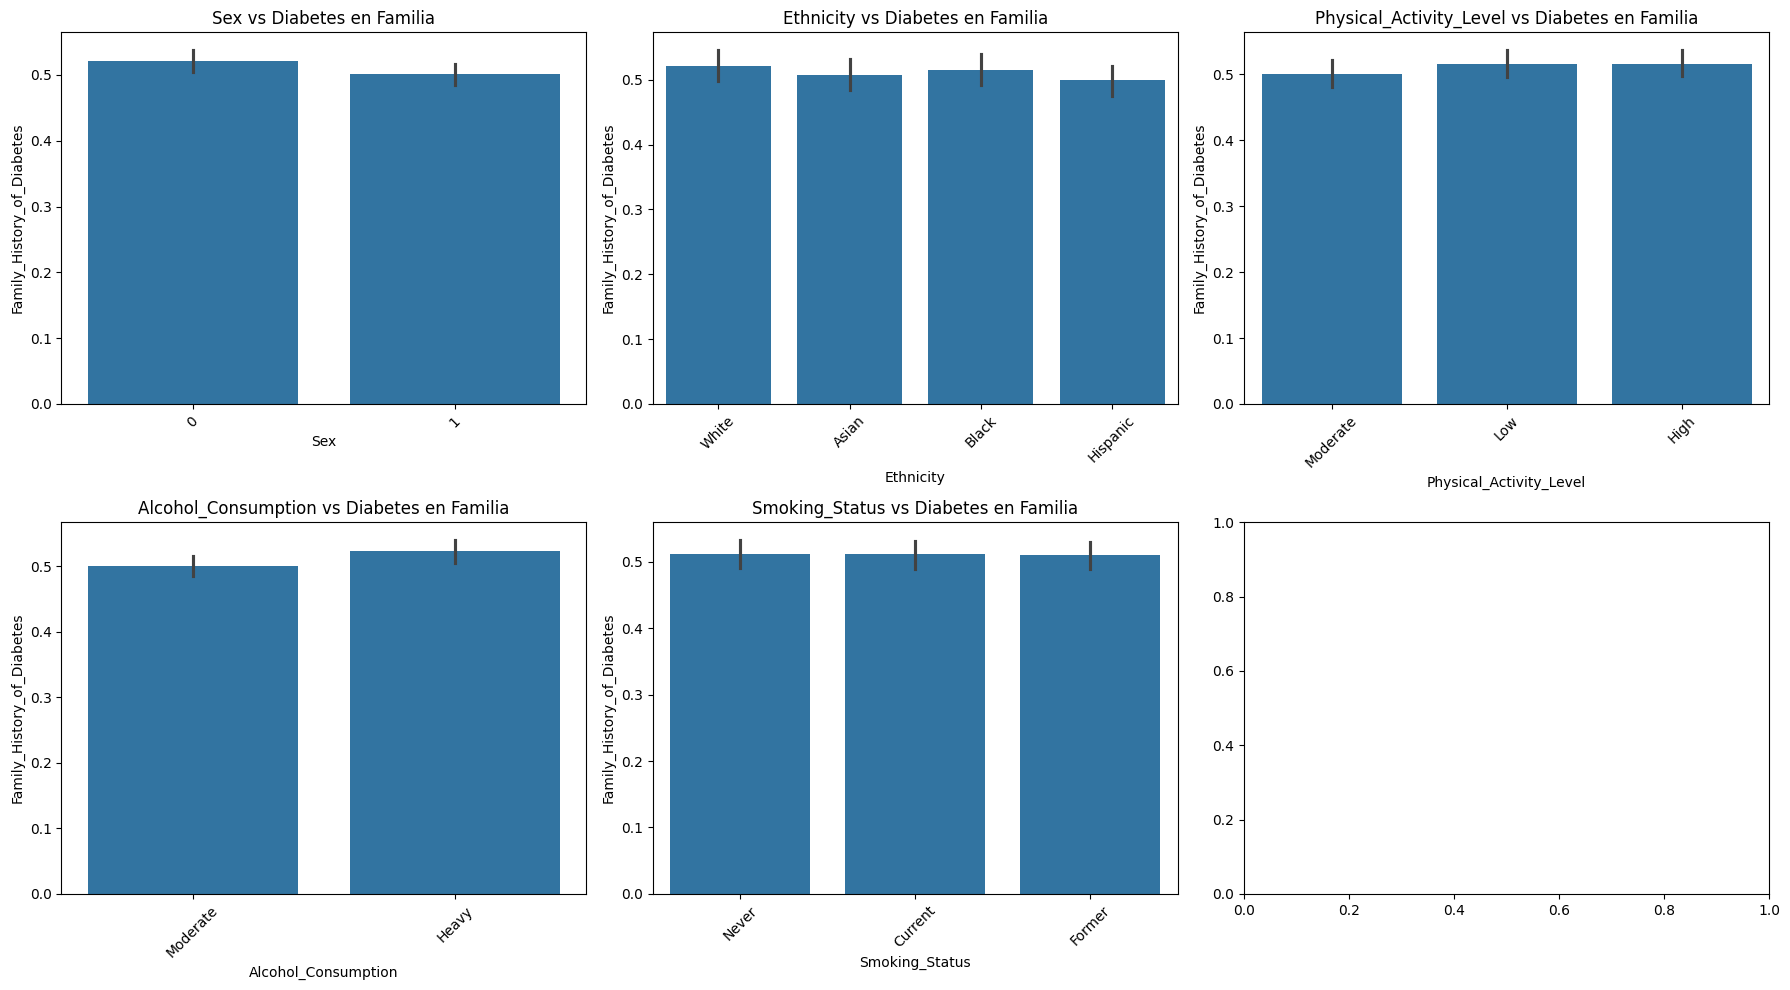

In [16]:
# Relación entre variables categóricas y la variable objetivo
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.barplot(data=df_cleaned, x=col, y='Family_History_of_Diabetes', ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes en Familia')
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

In [17]:
# --------------------------
# RESUMEN FINAL
# --------------------------
print("\nResumen final del dataset limpio:")
print(df_cleaned.info())


Resumen final del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            6680 non-null   int64  
 1   Sex                            6680 non-null   int64  
 2   Ethnicity                      6680 non-null   object 
 3   BMI                            6680 non-null   float64
 4   Waist_Circumference            6680 non-null   float64
 5   Fasting_Blood_Glucose          6680 non-null   float64
 6   HbA1c                          6680 non-null   float64
 7   Blood_Pressure_Systolic        6680 non-null   int64  
 8   Blood_Pressure_Diastolic       6680 non-null   int64  
 9   Cholesterol_Total              6680 non-null   float64
 10  Cholesterol_HDL                6680 non-null   float64
 11  Cholesterol_LDL                6680 non-null   float64
 12  GGT               

# Preprocesamiento de Datos

### 1. División en características y objetivo

In [18]:
X = df_cleaned.drop('Family_History_of_Diabetes', axis=1)
y = df_cleaned['Family_History_of_Diabetes']

In [19]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

# Definir transformaciones
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns)
])

# Aplicar transformaciones
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

print(f"Tamaño del conjunto de entrenamiento: {X_train_final.shape}")
print(f"Tamaño del conjunto de prueba: {X_test_final.shape}")

Tamaño del conjunto de entrenamiento: (5344, 27)
Tamaño del conjunto de prueba: (1336, 27)


# Implementación de Clasificadores

### Función para evaluar modelos 

In [20]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular métricas
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Reporte de clasificación
    cr = classification_report(y_test, y_test_pred)
    
    return {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1,
        'confusion_matrix': cm,
        'classification_report': cr
    }

### Modelo 1: Árbol de Decisión

In [21]:
# Pipeline para Árbol de Decisión
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10,min_samples_leaf=5,max_features='sqrt',random_state=42))
])

# Búsqueda de hiperparámetros
param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Mejor modelo
best_dt = grid_search_dt.best_estimator_

# Evaluación
dt_results = evaluate_model(best_dt, X_train, X_test, y_train, y_test)

print("Mejores parámetros para Árbol de Decisión:")
print(grid_search_dt.best_params_)
print("\nResultados del Árbol de Decisión:")
print(f"Exactitud en prueba: {dt_results['test_accuracy']:.4f}")
print(f"Recall en prueba: {dt_results['test_recall']:.4f}")
print(f"F1-score en prueba: {dt_results['test_f1']:.4f}")
print("\nMatriz de Confusión:")
print(dt_results['confusion_matrix'])
print("\nReporte de Clasificación:")
print(dt_results['classification_report'])

Mejores parámetros para Árbol de Decisión:
{'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Resultados del Árbol de Decisión:
Exactitud en prueba: 0.4963
Recall en prueba: 0.4451
F1-score en prueba: 0.4746

Matriz de Confusión:
[[359 294]
 [379 304]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       653
           1       0.51      0.45      0.47       683

    accuracy                           0.50      1336
   macro avg       0.50      0.50      0.50      1336
weighted avg       0.50      0.50      0.49      1336



### Modelo 2: SVM


MODELO 2: SUPPORT VECTOR MACHINE (SVM)
Entrenando modelo SVM...

Tiempo de entrenamiento: 2.95 segundos
Tiempo de predicción: 0.23 segundos

Matriz de Confusión (SVM):
[[309 344]
 [327 356]]


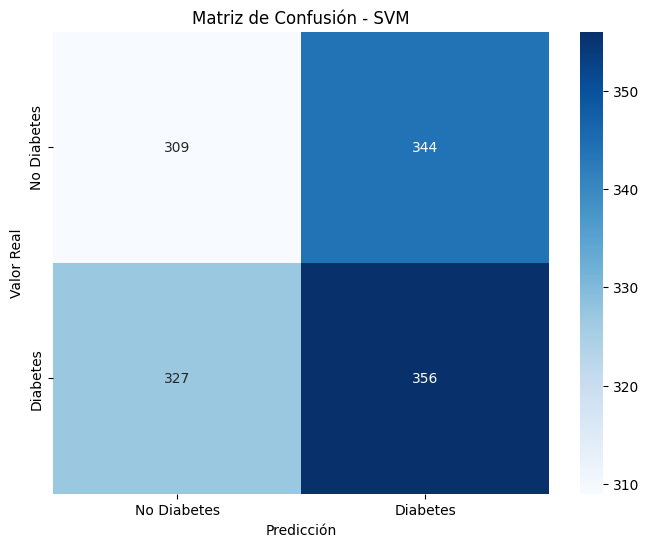


Reporte de Clasificación (SVM):
              precision    recall  f1-score   support

 No Diabetes       0.49      0.47      0.48       653
    Diabetes       0.51      0.52      0.51       683

    accuracy                           0.50      1336
   macro avg       0.50      0.50      0.50      1336
weighted avg       0.50      0.50      0.50      1336


Métricas adicionales:
Precisión: 0.5086
Recall/Sensibilidad: 0.5212
F1-Score: 0.5148
AUC-ROC: 0.4972


In [22]:
# 5. Implementación de SVM (Support Vector Machine)
print("\n" + "="*50)
print("MODELO 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

# Configuración del modelo SVM con parámetros fijos (más rápido que GridSearch)
svm = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Usamos el mismo preprocesador
    ('classifier', SVC(
        kernel='poly',
        degree=3, 
        C=5.0,
        gamma='auto',
        coef0=1.0,
        random_state=42,
        cache_size=500,  # Aumentar caché para mejorar velocidad
        shrinking=True,  # Usar heurística de shrinking para acelerar
        tol=0.01         # Mayor tolerancia para convergencia más rápida
    ))
])

# Entrenamiento del modelo con timer para medir performance
import time
start_time = time.time()

print("Entrenando modelo SVM...")
svm.fit(X_train, y_train)

train_time = time.time() - start_time
print(f"\nTiempo de entrenamiento: {train_time:.2f} segundos")

# Predicciones
start_time = time.time()
y_pred_svm = svm.predict(X_test)
predict_time = time.time() - start_time
print(f"Tiempo de predicción: {predict_time:.2f} segundos")

# Evaluación
print("\nMatriz de Confusión (SVM):")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.show()

# Métricas adicionales
print("\nReporte de Clasificación (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=['No Diabetes', 'Diabetes']))

# Métricas extendidas
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("\nMétricas adicionales:")
print(f"Precisión: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall/Sensibilidad: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_svm):.4f}")

### Modelo 3: Random Forest

In [23]:
# Pipeline para Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Búsqueda de hiperparámetros
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search_rf.best_estimator_

# Evaluación
rf_results = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("Mejores parámetros para Random Forest:")
print(grid_search_rf.best_params_)
print("\nResultados de Random Forest:")
print(f"Exactitud en prueba: {rf_results['test_accuracy']:.4f}")
print(f"Recall en prueba: {rf_results['test_recall']:.4f}")
print(f"F1-score en prueba: {rf_results['test_f1']:.4f}")
print("\nMatriz de Confusión:")
print(rf_results['confusion_matrix'])
print("\nReporte de Clasificación:")
print(rf_results['classification_report'])

Mejores parámetros para Random Forest:
{'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}

Resultados de Random Forest:
Exactitud en prueba: 0.4865
Recall en prueba: 0.6501
F1-score en prueba: 0.5642

Matriz de Confusión:
[[206 447]
 [239 444]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.46      0.32      0.38       653
           1       0.50      0.65      0.56       683

    accuracy                           0.49      1336
   macro avg       0.48      0.48      0.47      1336
weighted avg       0.48      0.49      0.47      1336

